# INFS5710 JupyterNotbook Combined
                                                                                Andreas Robert Kefeder     z5435364 
                                                                                Arief Suparmono            z5281675 
                                                                                Hangyu Shan                z5392160
                                                                                Juying Bai                 z5297043 
                                                                                Runbang Lu                 z5389974 
                                                                                Yuqing Lin                 z5379591 

## Table of Content:
* [1: Data Import and Data Cleaning](#step1)
* [2: Exploratory Data Analysis](#step2)
    * [2.1: Distribution of response variable (upsell_xsell)](#step2.1)
    * [2.2: EDA of Categorical Variables](#step2.2)
    * [2.3: EDA of Continuous Variables](#step2.3)
* [3: Machine Learning Techniques](#step3)
    * [3.1: Logistic Regression](#step3.1)
        * [3.1.1: Define Variables](#step3.1.1)
        * [3.1.2: Split Dataset for Training and Testing](#step3.1.2)
        * [3.1.3: Fit Logistic Regression Classifier](#step3.1.3)
        * [3.1.4: Evaluation of the logistic model performance](#step3.1.4)
    * [3.2: Neural Network](#step3.2)
        * [3.2.1: Define Variables](#step3.2.1)
        * [3.2.2: Split Dataset for Training and Testing](#step3.2.2)
        * [3.2.3: Fit Neural Network Multiple Layer Perception Classifier](#step3.2.3)
        * [3.2.4: Evaluation of the Neural Network model performance](#step3.2.4)
        * [3.2.5: Resample Dataset for Training and Testing](#step3.2.5)
        * [3.2.6: Fit Neural Network Multiple Layer Perception Classifier after Undersampling](#step3.2.6)
        * [3.2.7: Evaluation of the Neural Network model performance after Undersampling](#step3.2.7)
    * [3.3: Decision Tree](#step3.3)
        * [3.3.1: Define Variables](#step3.3.1)
        * [3.3.2: Split Dataset for Training and Testing](#step3.3.2)
        * [3.3.3: Fit Decision Tree Classifier](#step3.3.3)
        * [3.3.4: Evaluation of the Decision Tree model performance](#step3.3.4)
    * [3.4: Random Forest](#step3.4)
        * [3.4.1: Define Variables](#step3.4.1)
        * [3.4.2: Split Dataset for Training and Testing](#step3.4.2)
        * [3.4.3: Fit Random Forest Classifier](#step3.4.3)
        * [3.4.4: Evaluation of the Random Forest model performance](#step3.4.4)
* [4: Comparison of the performance of different ML Techniques](#step4)    
    


__Addition Libraries that may need to be installed before running of this notebook:__
1. Imbalanced Learn: conda install -c conda-forge imbalanced-learn
2. Category Encoders: conda install -c conda-forge category_encoders
3. Pydotplus: conda install -c conda-forge pydotplus

## 1. Data Import and Data Cleaning<a class="anchor" id="step1"></a>

In [1]:
# Here we Import necessary libraries to conduct step 1
import pandas as pd

In [2]:
# Read in the data
df=pd.read_csv("Customer_Data_Clean.csv",thousands=",")
df.head(5)

,Customer_ID,upsell_xsell,acct_age,credit_class,sales_channel,rfm_score,Est_HH_Income,region_US,state_US,cs_ttl_pop,cs_ttl_male,cs_ttl_female,cs_ttl_hhlds,cs_ttl_mdage,handset,data_device_age,equip_age,bill_data_usg_m03,data_usage_amt
0,83039.0,0.0,71.0,prime,Branded 3rd Party Retail,222.0,"$11,100",Great Lakes,IL,7.0,85.71,14.29,2.0,35.0,Apple,204.0,22.0,1508.0,3.0
1,1459738.0,0.0,35.0,near prime,National Sales,123.0,"$29,300",Greater Texas,LA,152.0,50.66,49.34,52.0,38.0,Apple,1500.0,0.0,553.0,32.0
2,3896711.0,0.0,46.0,prime,Retail,111.0,"$14,300",Mid Atlantic,PA,187.0,49.73,50.27,76.0,36.0,Apple,982.0,0.0,1651.0,3.0
3,3913099.0,0.0,57.0,prime,Indirect,212.0,"$45,100",Pacific,WA,243.0,49.38,50.62,92.0,34.0,Apple,1452.0,21.0,978.0,4.0
4,812671.0,0.0,65.0,prime,National Sales,313.0,"$31,600",Southwest,NV,262.0,51.15,48.85,94.0,41.0,LG,783.0,2.0,327.0,11.0


In [3]:
# Clean Est_HH_Income
df["Est_HH_Income"]=df["Est_HH_Income"].apply(lambda x: float(str(x).replace("$","").replace(",","")))

In [4]:
# Checking empty value
df[df.isnull().any(axis=1)]

,Customer_ID,upsell_xsell,acct_age,credit_class,sales_channel,rfm_score,Est_HH_Income,region_US,state_US,cs_ttl_pop,cs_ttl_male,cs_ttl_female,cs_ttl_hhlds,cs_ttl_mdage,handset,data_device_age,equip_age,bill_data_usg_m03,data_usage_amt
20,1017188.0,0.0,46.0,prime,Retail,221.0,30100.0,Great Lakes,WI,518.0,78.19,21.81,NaN,30.0,Apple,982.0,23.0,281.0,1.0
1214,2940089.0,0.0,36.0,near prime,National Sales,331.0,21800.0,South,SC,6282.0,65.27,34.73,NaN,21.0,Samsung,98.0,26.0,3800.0,53.0
9776,1326911.0,0.0,46.0,prime,Retail,133.0,43700.0,Southwest,AZ,NaN,NaN,NaN,NaN,NaN,Apple,982.0,19.0,3288.0,27.0
9777,3606930.0,0.0,46.0,prime,Retail,331.0,31800.0,South,NC,NaN,NaN,NaN,NaN,NaN,Samsung,1225.0,19.0,3152.0,11.0
9778,494424.0,0.0,53.0,near prime,Retail,222.0,18400.0,Great Lakes,IL,NaN,NaN,NaN,NaN,NaN,LG,1643.0,26.0,2111.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2867035.0,0.0,66.0,near prime,Indirect,213.0,17000.0,Greater Texas,TX,NaN,NaN,NaN,NaN,NaN,Apple,1308.0,3.0,2156.0,43.0
9997,3226368.0,0.0,46.0,prime,Retail,111.0,44600.0,Great Lakes,IL,NaN,NaN,NaN,NaN,NaN,Apple,982.0,22.0,1363.0,13.0
9998,79064.0,0.0,54.0,other,Indirect,222.0,18400.0,Pacific,WA,NaN,NaN,NaN,NaN,NaN,Apple,1195.0,0.0,1615.0,3.0
9999,79669.0,0.0,48.0,prime,Retail,213.0,17800.0,Great Lakes,IL,NaN,NaN,NaN,NaN,NaN,Apple,759.0,1.0,2011.0,37.0


In [5]:
# Remove 10000th row as it contains nothing but NaN
df = df.iloc[0:10000,:]
#Check again for columns containing NaN
df.isnull().any(axis=0)

Customer_ID          False
upsell_xsell         False
acct_age             False
credit_class         False
sales_channel        False
rfm_score            False
Est_HH_Income        False
region_US            False
state_US             False
cs_ttl_pop            True
cs_ttl_male           True
cs_ttl_female         True
cs_ttl_hhlds          True
cs_ttl_mdage          True
handset              False
data_device_age      False
equip_age            False
bill_data_usg_m03    False
data_usage_amt       False
dtype: bool

In [6]:
# Columns containing null values are cs_ttl_pop cs_ttl_male cs_ttl_hhlds cs_ttl_mdage
# All of above columns are float and we decide to replace the nulls with mean values of the columns
for col in ['cs_ttl_pop','cs_ttl_male','cs_ttl_female','cs_ttl_hhlds','cs_ttl_mdage']:
    df[col]=df[col].fillna(df[col].mean())
# Check again for null values
df[df.isnull().any(axis=1)]

,Customer_ID,upsell_xsell,acct_age,credit_class,sales_channel,rfm_score,Est_HH_Income,region_US,state_US,cs_ttl_pop,cs_ttl_male,cs_ttl_female,cs_ttl_hhlds,cs_ttl_mdage,handset,data_device_age,equip_age,bill_data_usg_m03,data_usage_amt


## 2. Exploratory Data Analysis (EDA)<a class="anchor" id="step2"></a>

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",palette=sns.color_palette("Set2"))

In [8]:
# Categorize based on the types of variables
category_cols=['credit_class', 'sales_channel', 'handset', 'region_US', 'state_US']
numerical_cols=[ 'acct_age', 'rfm_score', 'Est_HH_Income', 'cs_ttl_pop', 'cs_ttl_male', 'cs_ttl_female', 'cs_ttl_hhlds',
       'cs_ttl_mdage', 'data_device_age', 'equip_age', 'bill_data_usg_m03',  'data_usage_amt']

### 2.1 Distribution of response variable (upsell_xsell) <a class="anchor" id="step2.1"></a>

,index,upsell_xsell,Percentage
0,0.0,8826,88.26
1,1.0,1174,11.74


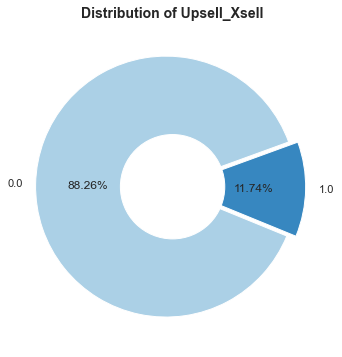

In [9]:
y_dist=df["upsell_xsell"].value_counts()
y_dist2 = pd.DataFrame(y_dist, columns = ['upsell_xsell'])
y_dist2['Percentage']=y_dist2["upsell_xsell"]/(y_dist2['upsell_xsell'].sum()) * 100
display(y_dist2.reset_index())
# plot

plt.show()
plt.figure(figsize=(6,6))
plt.pie(x=y_dist.values,labels = y_dist.index,autopct='%0.2f%%'
        ,startangle=20
        ,explode=[0.05,0.02]
        ,colors=sns.color_palette("Blues", n_colors=y_dist.shape[0]))

circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.title("Distribution of Upsell_Xsell",fontsize=14,fontweight="bold")

plt.show()

__Interpretation of the result:__
1. 88.26% of the data records did not upselled or xselled
2. 11.74% of the data records did upselled or xselled
3. The response variable is heavily skewed


### 2.2 EDA of Categorical Variables <a class="anchor" id="step2.2"></a>

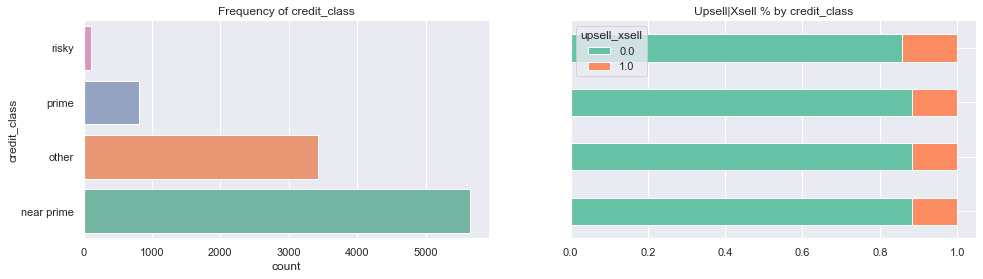

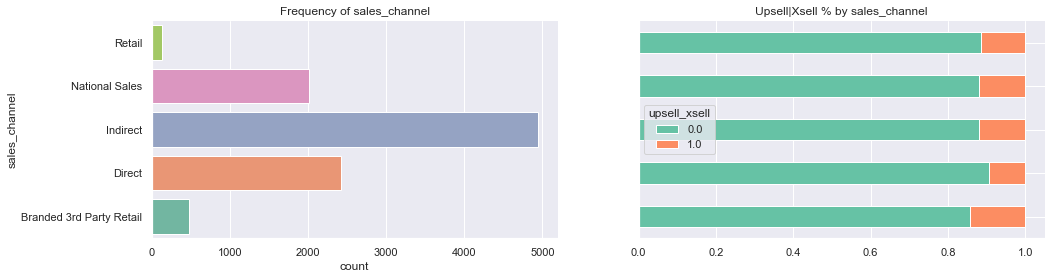

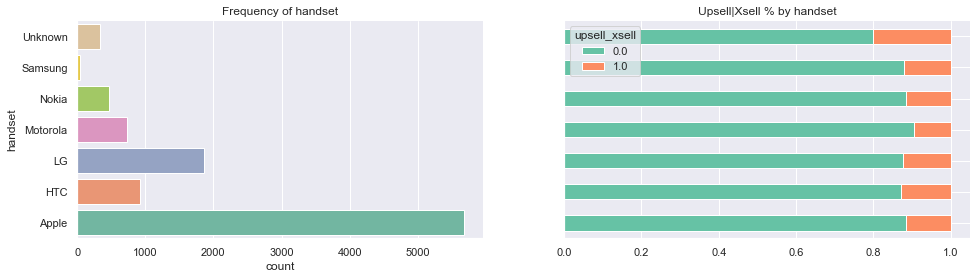

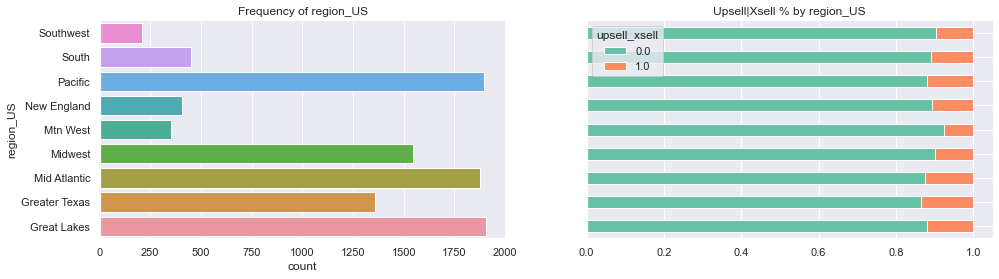

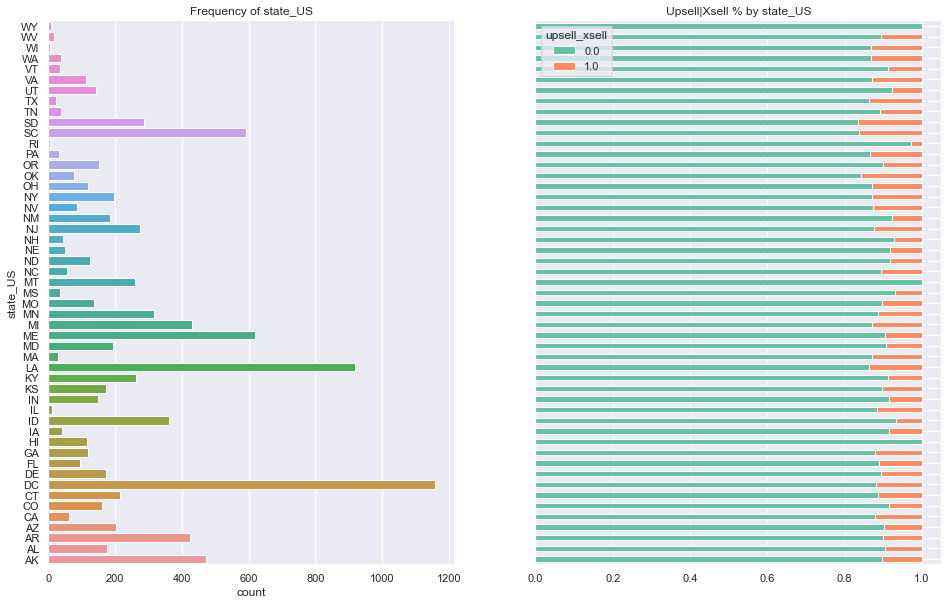

In [10]:
# The right-hand graph shows the proportion of upsell or xsell in each category
# If the proportion of upsell in the different categories of a categorical variable is about the same 
# then that variable has nothing to do with y

for col in category_cols:
    if col=='state_US':
        fig,axs=plt.subplots(1,2,figsize=(16,10),sharey=True)
    else:
        fig,axs=plt.subplots(1,2,figsize=(16,4),sharey=True)
    
    sns.countplot(y=col,data=df,ax=axs[0])
    axs[0].set_title("Frequency of {}".format(col),fontsize=12)    
    sns.despine()
    
    tmp_stats=df.pivot_table(columns=["upsell_xsell"],index=[col],values="Customer_ID",aggfunc="count")
    tmp_stats.sum(axis=1)
    tmp_stats=tmp_stats.div(tmp_stats.sum(axis=1),axis=0) 
    tmp_stats.plot.barh(stacked=True,ax=axs[1],rot=0)
    axs[1].set_title("Upsell|Xsell % by {}".format(col),fontsize=12)
    sns.despine()
    plt.show()
    print( )

### 2.3 EDA of Continuous Variables <a class="anchor" id="step2.3"></a>

In [11]:
#using 1.5 IQR outliers
outliers={}
for col in numerical_cols:
    lower=df[col].quantile(0.25)-(df[col].quantile(0.75)-df[col].quantile(0.25))*1.5
    upper=df[col].quantile(0.75)+(df[col].quantile(0.75)-df[col].quantile(0.25))*1.5
    outliers[col]=[lower,upper]

# Here we findout the boundaries for outliers in each numerical columns
outliers

{'acct_age': [14.5, 74.5],
 'rfm_score': [-142.0, 586.0],
 'Est_HH_Income': [-14700.0, 78900.0],
 'cs_ttl_pop': [-23850.375, 74816.625],
 'cs_ttl_male': [45.019999999999996, 52.86],
 'cs_ttl_female': [47.14, 54.980000000000004],
 'cs_ttl_hhlds': [-8683.125, 27577.875],
 'cs_ttl_mdage': [25.5, 45.5],
 'data_device_age': [-592.5, 2299.5],
 'equip_age': [-34.0, 70.0],
 'bill_data_usg_m03': [-1687.0, 5225.0],
 'data_usage_amt': [-24.0, 48.0]}

In [12]:
# Process Outliers by replacing outliers with boundaries
for col in numerical_cols:
    df[col]=df[col].map(lambda x:x if x >= outliers[col][0] else outliers[col][0])
    df[col]=df[col].map(lambda x:x if x <= outliers[col][1] else outliers[col][1])

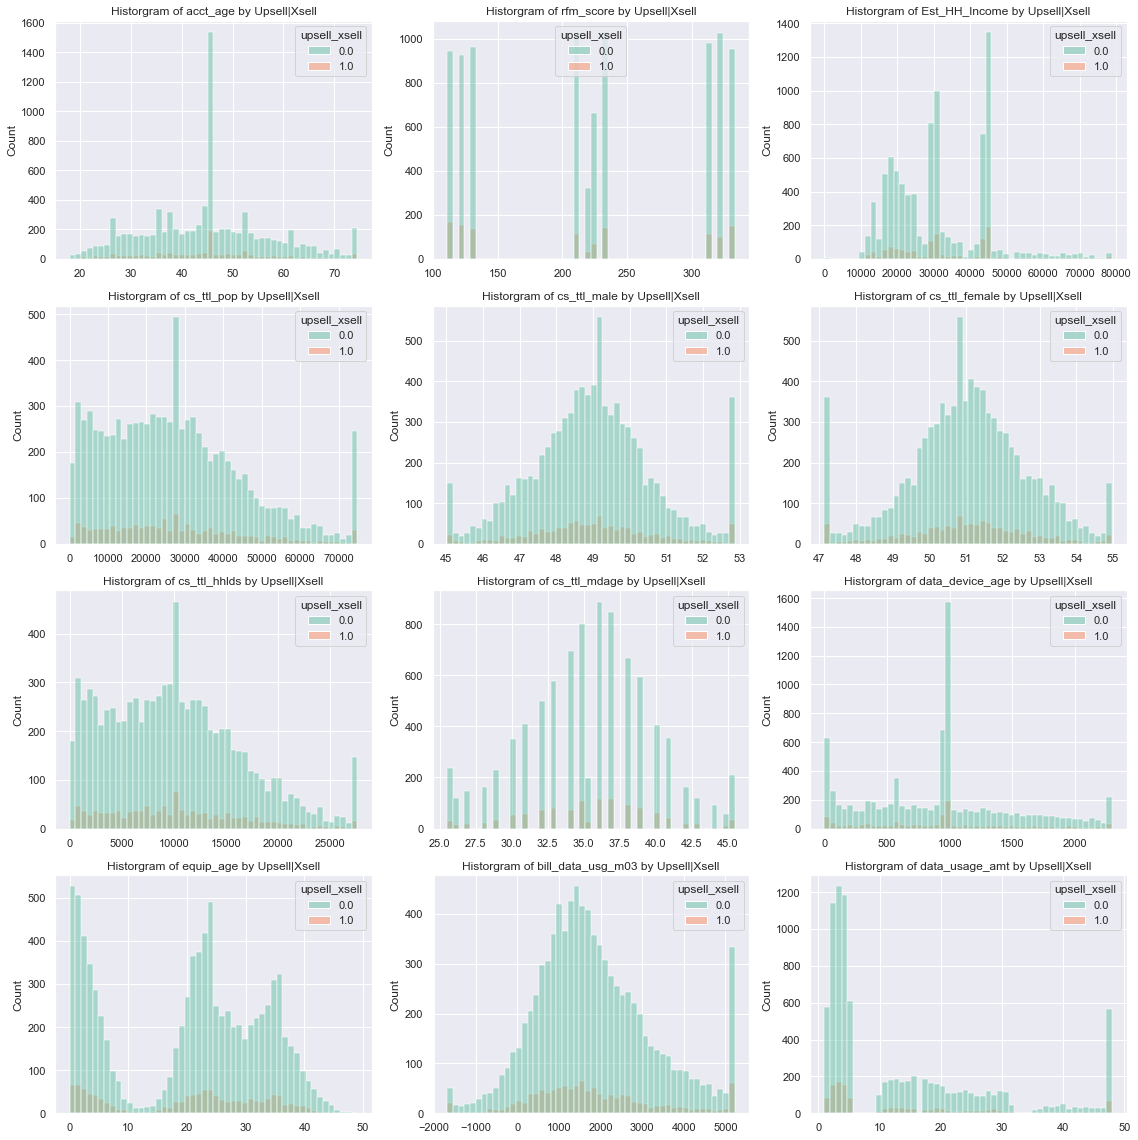

In [13]:
fig,axs=plt.subplots(4,3,figsize=(16,16))
axs=axs.flatten()

for icol in range(len(numerical_cols)):   
    
    sns.histplot(x=numerical_cols[icol],bins=50,hue="upsell_xsell",data=df,ax=axs[icol])
    axs[icol].set_title("Historgram of {} by Upsell|Xsell".format(numerical_cols[icol]),fontsize=12)
    axs[icol].set_xlabel("")

plt.tight_layout()

## 3. Machine Learning Techniques<a class="anchor" id="step3"></a>

__Steps of Implementing Machine Learning Techniques__
1. Define variables
2. Split Dataset for Training and Testing
3. Implement suitable classifier models
4. Evaluate the performance of different models with different parameters


__Parameters for performance evaluation__
1. Confusion Matrix
2. Accuracy Score
3. Precision Score
4. Recall Score
5. F1 Score
6. ROC AUC Score
7. ROC Curve

__Attempts to rebalance the dataset:__
    
When we tried to run different models with unbalanced dataset, it is not surprising that the performance of all ML modelling techniques are not well. We explored different methods to rebalance the data, and finally chose the undersampling technique
on Neural Network MLP, Decision Tree and Random Forest Modelling. For Logistic regression, we adjusted the class_weight to be 'balanced' in logistic regression classifier. Although the implemetation might be a bit different among different ML techniques, we witnessed obvious increase in the performance on all ML models.

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Set default lists to record scores for different ML techniques
accuracyscore=[0,0,0,0,0]
precisionscore=[0,0,0,0,0]
recallscore=[0,0,0,0,0]
f1score=[0,0,0,0,0]
rocaucscore=[0,0,0,0,0]

### 3.1 Logistic Regression<a class="anchor" id="step3.1"></a>

In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

#### 3.1.1 Define variables<a class="anchor" id="step3.1.1"></a>

In [16]:
# Defining the independent variables as RFM Score, equipment age and bill data usage.
X_LogReg = df.iloc[:, [5,16,17]].values 
Y_LogReg = df.iloc[:, 1].values

#### 3.1.2 Split Dataset for Training and Testing<a class="anchor" id="step3.1.2"></a>

+ 25% as test data set, 75% as training data set

In [17]:
# Splitting the dataset into the Training set and Test set
X_LogReg_Train, X_LogReg_Test, Y_LogReg_Train, Y_LogReg_Test = train_test_split(X_LogReg, Y_LogReg, test_size = 0.25, random_state = 1)
# Showing array of the test and train sets
print("X_train shape: ",X_LogReg_Train.shape)
print("X_test shape : ",X_LogReg_Test.shape)
print("Y_train shape: ",Y_LogReg_Train.shape)
print("Y_test shape : ",Y_LogReg_Test.shape)

X_train shape:  (7500, 3)
X_test shape :  (2500, 3)
Y_train shape:  (7500,)
Y_test shape :  (2500,)


In [18]:
# Feature Scaling (Standardization) for both training and test independent variables to avoid differences in scaling to impact the model

sc_X = StandardScaler()
X_LogReg_Train = sc_X.fit_transform(X_LogReg_Train)
X_LogReg_Test = sc_X.transform(X_LogReg_Test)

#### 3.1.3 Fit Logistic Regression Classifier<a class="anchor" id="step3.1.3"></a>

In [19]:
# Fitting Logistic Logression into Training Set
# class_weight = 'balanced' is used to balance the skewed dataset

classifier = LogisticRegression(solver = 'liblinear', random_state = 1, class_weight = "balanced")
classifier.fit(X_LogReg_Train, Y_LogReg_Train)

LogisticRegression(class_weight='balanced', random_state=1, solver='liblinear')

In [20]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [21]:
classifier.intercept_
#predict the test set results
#predict the probabilities of upsell and not upsell for each observation for test dataset
Y_LogReg_Probs = classifier.predict_proba(X_LogReg_Test)

In [22]:
classifier.coef_

array([[-0.10411669, -0.0512841 ,  0.03466445]])

In [23]:
#predict whether an individual upsells or not for test dataset; default threshold 0.5
Y_LogReg_Pred = classifier.predict(X_LogReg_Test)

#### 3.1.4 Evaluation of the logistic model performance<a class="anchor" id="step3.1.4"></a>

Confusion matrix

 [[1134 1079]
 [ 128  159]]

True Negatives(TN) =  1134

True Positives(TP) =  159

False Positives(FP) =  1079

False Negatives(FN) =  128


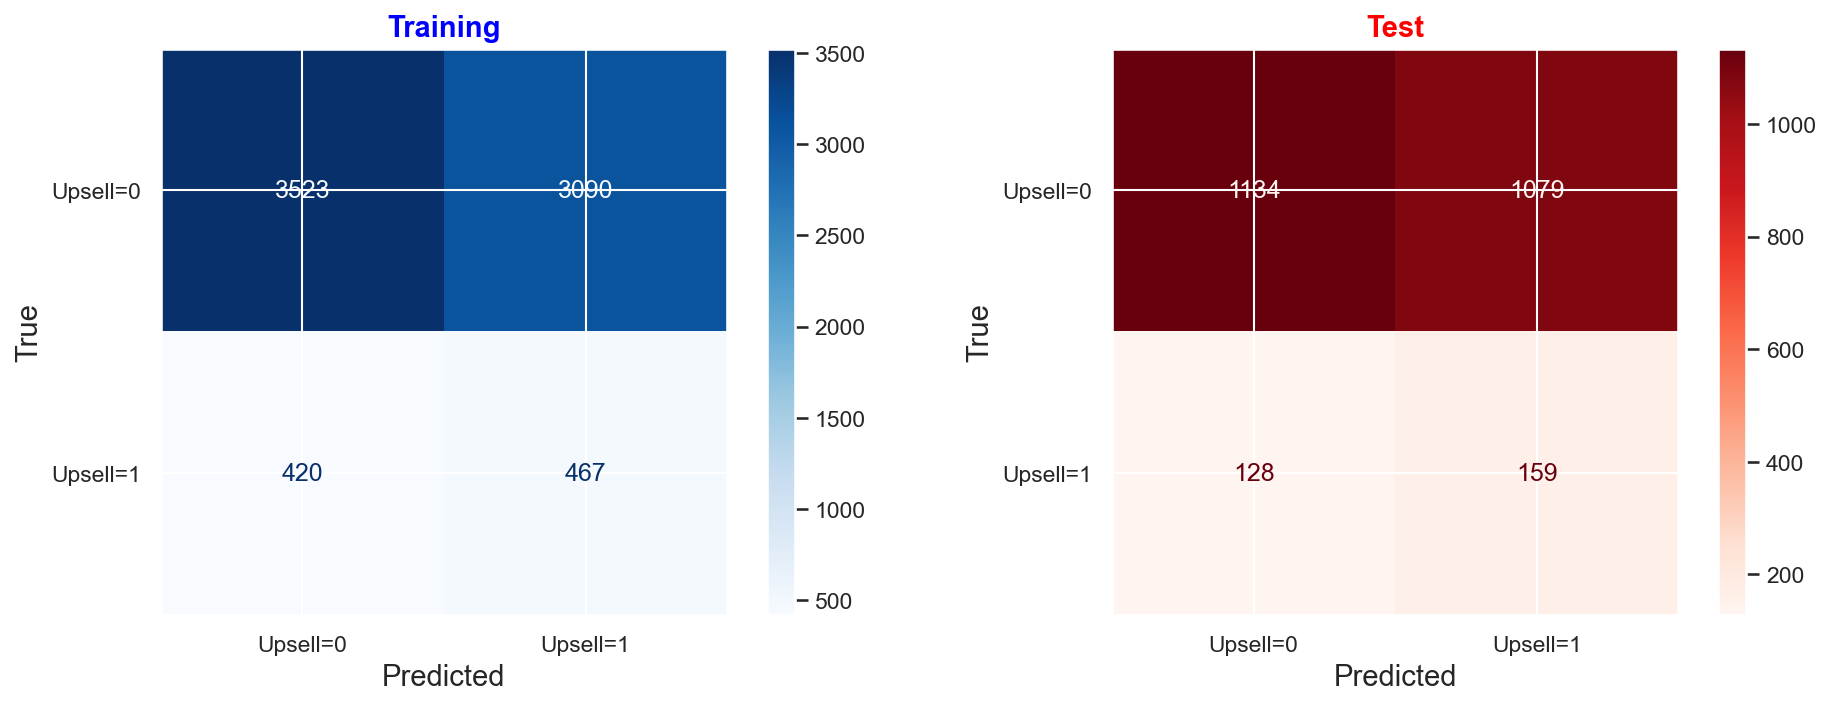

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_LogisticRegression = confusion_matrix(Y_LogReg_Test, Y_LogReg_Pred)
print('Confusion matrix\n\n', cm_LogisticRegression)
print('\nTrue Negatives(TN) = ', cm_LogisticRegression[0,0])  #Actual Negative:0 and Predict Negative:0
print('\nTrue Positives(TP) = ', cm_LogisticRegression[1,1])  #Actual Positive:1 and Predict Positive:1
print('\nFalse Positives(FP) = ', cm_LogisticRegression[0,1])  #Actual Negative:0 but Predict Positive:1
print('\nFalse Negatives(FN) = ', cm_LogisticRegression[1,0])   #Actual Positive:1 but Predict Negative:0

from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(15,5),dpi=150)
disp = ConfusionMatrixDisplay.from_estimator( classifier, X_LogReg_Train, Y_LogReg_Train, display_labels=["Upsell=0","Upsell=1"],ax=axs[0],cmap=plt.cm.Blues)
axs[0].set_title("Training",fontsize=14,color="blue",fontweight="bold")
axs[0].set_xlabel("Predicted",fontsize=14)
axs[0].set_ylabel("True",fontsize=14)

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_LogReg_Test, Y_LogReg_Test, display_labels=["Upsell=0","Upsell=1"],ax=axs[1],cmap=plt.cm.Reds)
axs[1].set_title("Test",fontsize=14,color="red",fontweight="bold")
axs[1].set_xlabel("Predicted",fontsize=14)
axs[1].set_ylabel("True",fontsize=14)


plt.show()  

In [25]:
accuracyscore[0]=(accuracy_score(Y_LogReg_Test, Y_LogReg_Pred))
precisionscore[0]=precision_score(Y_LogReg_Test, Y_LogReg_Pred)
recallscore[0]=(recall_score(Y_LogReg_Test, Y_LogReg_Pred))
f1score[0]=(f1_score(Y_LogReg_Test, Y_LogReg_Pred))
rocaucscore[0]=(roc_auc_score(Y_LogReg_Test, Y_LogReg_Pred))

print('Model Accuracy score: {0:0.4f}'. format(accuracyscore[0]))
print('Model Precision score: {0:0.4f}'. format(precisionscore[0]))
print('Model Recall score: {0:0.4f}'. format(recallscore[0]))
print('Model F1 score: {0:0.4f}'. format(f1score[0]))
print('Model ROC AUC score: {0:0.4f}'. format(rocaucscore[0]))

print(classification_report(Y_LogReg_Test, Y_LogReg_Pred))

Model Accuracy score: 0.5172
Model Precision score: 0.1284
Model Recall score: 0.5540
Model F1 score: 0.2085
Model ROC AUC score: 0.5332
              precision    recall  f1-score   support

         0.0       0.90      0.51      0.65      2213
         1.0       0.13      0.55      0.21       287

    accuracy                           0.52      2500
   macro avg       0.51      0.53      0.43      2500
weighted avg       0.81      0.52      0.60      2500



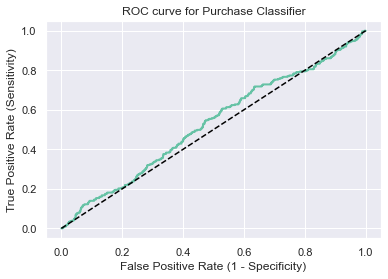

In [26]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(Y_LogReg_Test, Y_LogReg_Probs[:,1], pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Purchase Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### 3.2 Neural Network<a class="anchor" id="step3.2"></a>

In [27]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

#### 3.2.1 Define variables<a class="anchor" id="step3.2.1"></a>

In [28]:
# We would like to test all variables including categorical variables
df_dummy = pd.get_dummies(df)
# Define the Predictor variables to be all variables other than the ID and response variable
x=df_dummy.drop(['upsell_xsell','Customer_ID'], axis = 1)
y=df_dummy["upsell_xsell"]

#### 3.2.2 Split Dataset for Training and Testing<a class="anchor" id="step3.2.2"></a>

+ 25% as test data set, 75% as training data set

In [29]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_Train.shape)
print("X_test shape : ",X_Test.shape)
print("Y_train shape: ",Y_Train.shape)
print("Y_test shape : ",Y_Test.shape)

X_train shape:  (7500, 88)
X_test shape :  (2500, 88)
Y_train shape:  (7500,)
Y_test shape :  (2500,)


In [30]:
# Feature Scaling (Standardization) for both training and test independent variables to avoid differences in scaling to impact the model

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#### 3.2.3 Fit Neural Network Multiple Layer Perception Classifier<a class="anchor" id="step3.2.3"></a>

In [31]:
# The default max_iter (200) do not convergent, max_iter = 1000 guarentees convergence
mlp = MLPClassifier(max_iter=1000)
# fit the model with data
mlp.fit(X_Train, Y_Train)
y_pred_mlp = mlp.predict(X_Test)
Y_Probs= mlp.predict_proba(X_Test)

Since the Neural Network MLP Classifier does not support finding feature importance in Sklearn Library, we will not look for
feature importance with Neural Network Modelling technique.

#### 3.2.4 Evaluation of the Neural Network model performance<a class="anchor" id="step3.2.4"></a>

Confusion matrix

 [[1992  221]
 [ 262   25]]

True Negatives(TN) =  1992

True Positives(TP) =  25

False Positives(FP) =  221

False Negatives(FN) =  262


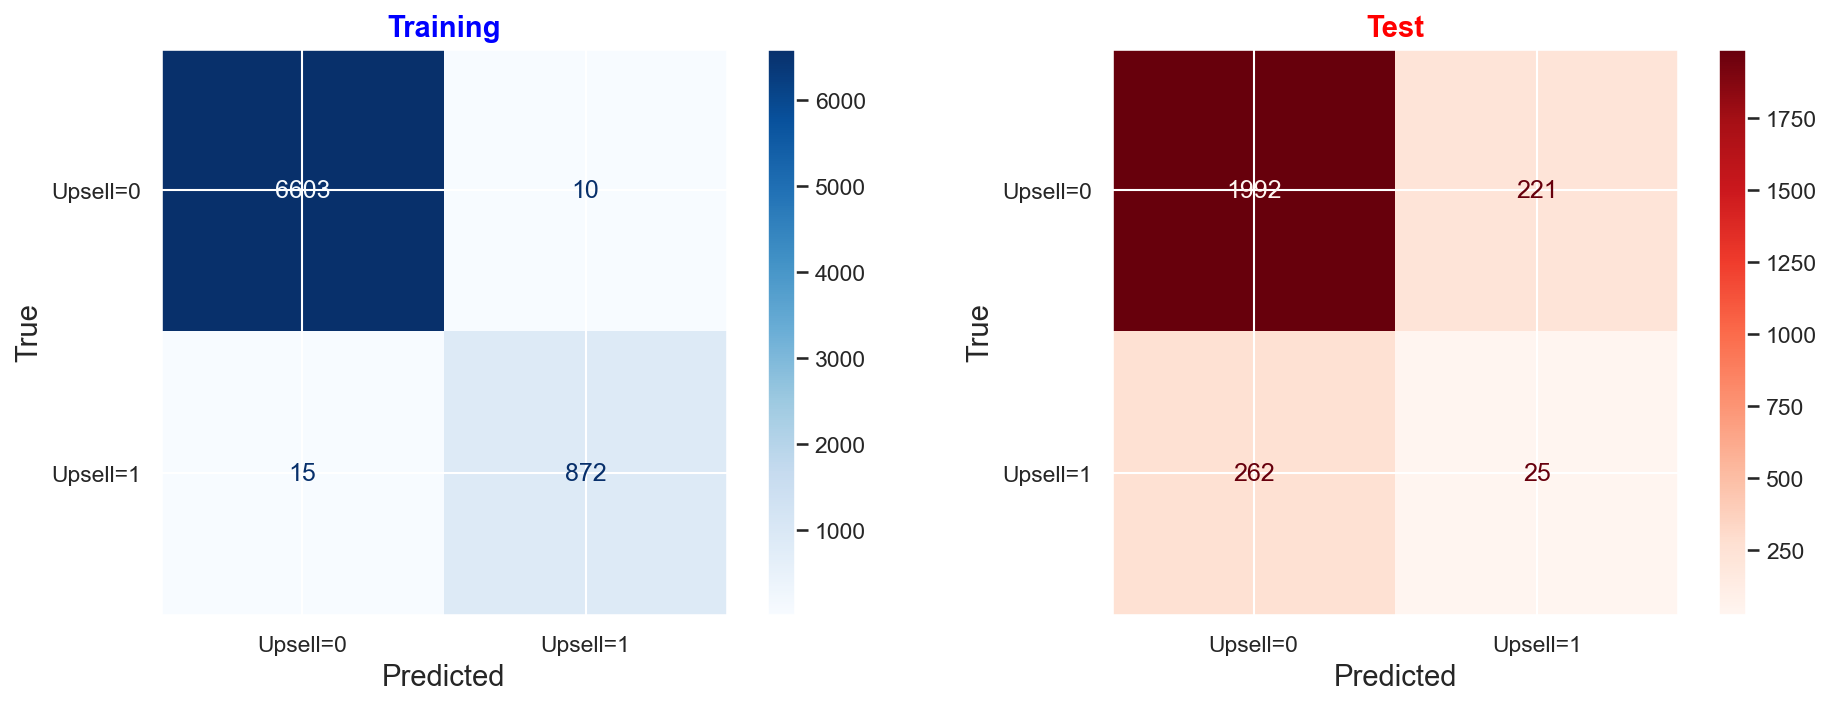

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_Test, y_pred_mlp)

print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])  #Actual Negative:0 and Predict Negative:0
print('\nTrue Positives(TP) = ', cm[1,1])  #Actual Positive:1 and Predict Positive:1
print('\nFalse Positives(FP) = ', cm[0,1])  #Actual Negative:0 but Predict Positive:1
print('\nFalse Negatives(FN) = ', cm[1,0])   #Actual Positive:1 but Predict Negative:0

from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(15,5),dpi=150)
disp = ConfusionMatrixDisplay.from_estimator( mlp, X_Train, Y_Train, display_labels=["Upsell=0","Upsell=1"],ax=axs[0],cmap=plt.cm.Blues)
axs[0].set_title("Training",fontsize=14,color="blue",fontweight="bold")
axs[0].set_xlabel("Predicted",fontsize=14)
axs[0].set_ylabel("True",fontsize=14)

disp = ConfusionMatrixDisplay.from_estimator( mlp, X_Test, Y_Test, display_labels=["Upsell=0","Upsell=1"],ax=axs[1],cmap=plt.cm.Reds)
axs[1].set_title("Test",fontsize=14,color="red",fontweight="bold")
axs[1].set_xlabel("Predicted",fontsize=14)
axs[1].set_ylabel("True",fontsize=14)


plt.show()  

In [33]:
accuracyscore[1]=accuracy_score(Y_Test, y_pred_mlp)
precisionscore[1]=precision_score(Y_Test, y_pred_mlp)
recallscore[1]=recall_score(Y_Test, y_pred_mlp)
f1score[1]=f1_score(Y_Test, y_pred_mlp)
rocaucscore[1]=roc_auc_score(Y_Test, y_pred_mlp)

print('Model Accuracy score: {0:0.4f}'. format(accuracyscore[1]))
print('Model Precision score: {0:0.4f}'. format(precisionscore[1]))
print('Model Recall score: {0:0.4f}'. format(recallscore[1]))
print('Model F1 score: {0:0.4f}'. format(f1score[1]))
print('Model ROC AUC score: {0:0.4f}'. format(rocaucscore[1]))

print(classification_report(Y_Test, y_pred_mlp))

Model Accuracy score: 0.8068
Model Precision score: 0.1016
Model Recall score: 0.0871
Model F1 score: 0.0938
Model ROC AUC score: 0.4936
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2213
         1.0       0.10      0.09      0.09       287

    accuracy                           0.81      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.79      0.81      0.80      2500



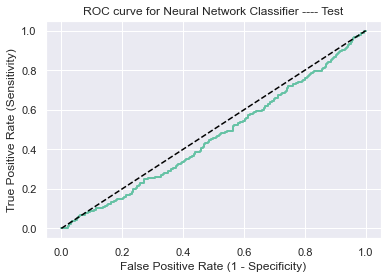

In [34]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Probs[:,1], pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Neural Network Classifier ---- Test')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

#### 3.2.5 Resample Dataset for Training and Testing<a class="anchor" id="step3.2.5"></a>

In [35]:
# Import necessary libraries
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
# Resample x and y
cc = ClusterCentroids(random_state=0)
x_resampled, y_resampled = cc.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()))

[(0.0, 1174), (1.0, 1174)]


In [36]:
# Reassign Training and Testing Datasets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 0)
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#### 3.2.6 Fit Neural Network Multiple Layer Perception Classifier after Undersampling<a class="anchor" id="step3.2.6"></a>

In [37]:
mlp = MLPClassifier(max_iter=1000)
# fit the model with data
mlp.fit(X_Train, Y_Train)
y_pred_mlp = mlp.predict(X_Test)
Y_Probs= mlp.predict_proba(X_Test)

#### 3.2.7 Evaluation of the Neural Network model performance after Undersampling<a class="anchor" id="step3.2.7"></a>

Confusion matrix

 [[236  13]
 [  3 218]]

True Negatives(TN) =  236

True Positives(TP) =  218

False Positives(FP) =  13

False Negatives(FN) =  3


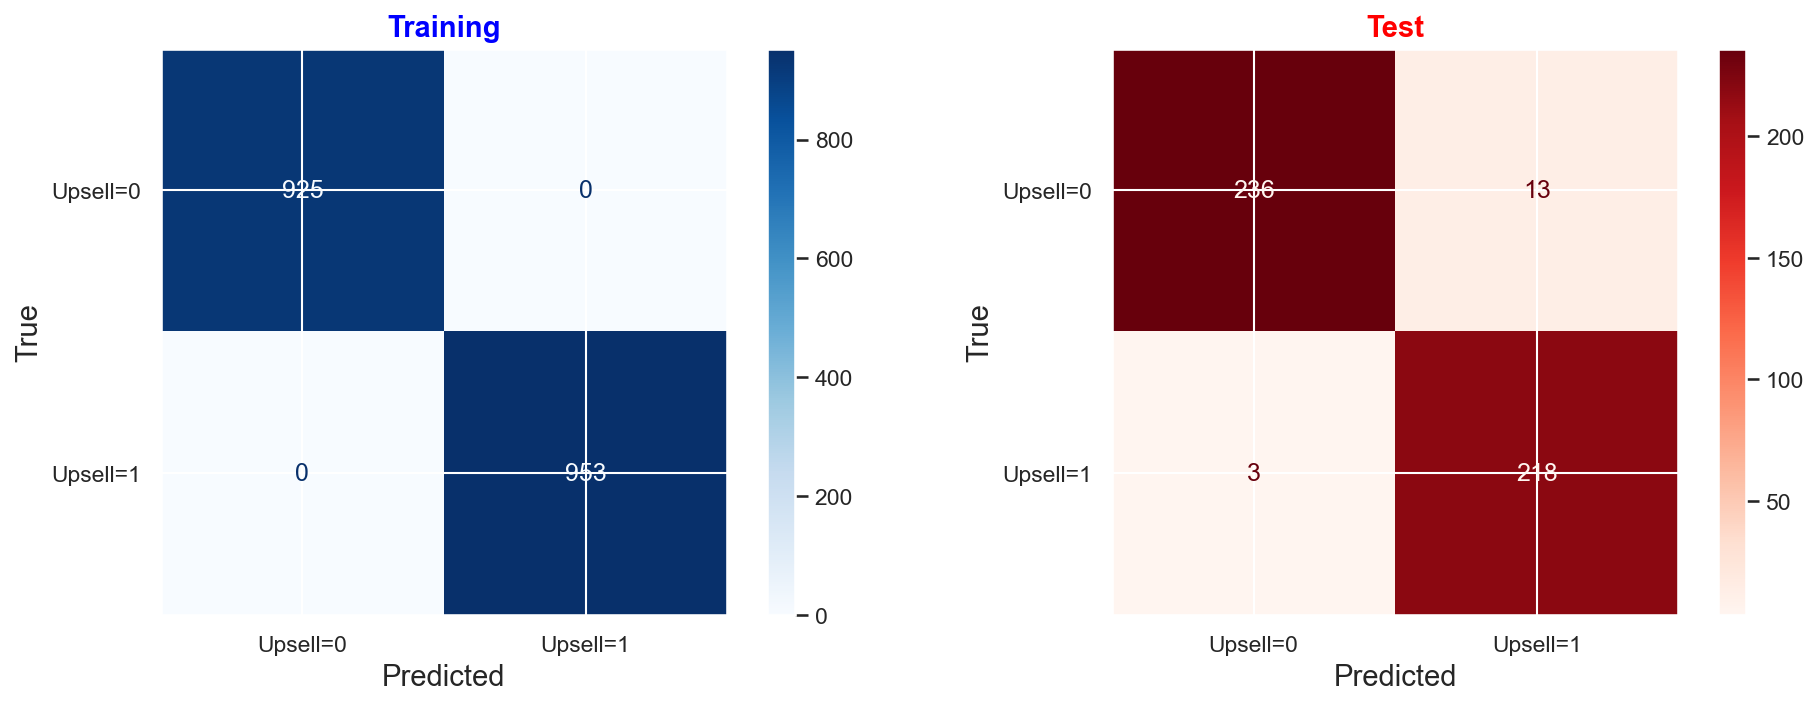

In [38]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, y_pred_mlp)

print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])  #Actual Negative:0 and Predict Negative:0
print('\nTrue Positives(TP) = ', cm[1,1])  #Actual Positive:1 and Predict Positive:1
print('\nFalse Positives(FP) = ', cm[0,1])  #Actual Negative:0 but Predict Positive:1
print('\nFalse Negatives(FN) = ', cm[1,0])   #Actual Positive:1 but Predict Negative:0

from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(15,5),dpi=150)
disp = ConfusionMatrixDisplay.from_estimator( mlp, X_Train, Y_Train, display_labels=["Upsell=0","Upsell=1"],ax=axs[0],cmap=plt.cm.Blues)
axs[0].set_title("Training",fontsize=14,color="blue",fontweight="bold")
axs[0].set_xlabel("Predicted",fontsize=14)
axs[0].set_ylabel("True",fontsize=14)

disp = ConfusionMatrixDisplay.from_estimator( mlp, X_Test, Y_Test, display_labels=["Upsell=0","Upsell=1"],ax=axs[1],cmap=plt.cm.Reds)
axs[1].set_title("Test",fontsize=14,color="red",fontweight="bold")
axs[1].set_xlabel("Predicted",fontsize=14)
axs[1].set_ylabel("True",fontsize=14)


plt.show()  

In [39]:
accuracyscore[2]=accuracy_score(Y_Test, y_pred_mlp)
precisionscore[2]=precision_score(Y_Test, y_pred_mlp)
recallscore[2]=recall_score(Y_Test, y_pred_mlp)
f1score[2]=f1_score(Y_Test, y_pred_mlp)
rocaucscore[2]=roc_auc_score(Y_Test, y_pred_mlp)

print('Model Accuracy score: {0:0.4f}'. format(accuracyscore[2]))
print('Model Precision score: {0:0.4f}'. format(precisionscore[2]))
print('Model Recall score: {0:0.4f}'. format(recallscore[2]))
print('Model F1 score: {0:0.4f}'. format(f1score[2]))
print('Model ROC AUC score: {0:0.4f}'. format(rocaucscore[2]))

print(classification_report(Y_Test, y_pred_mlp))

Model Accuracy score: 0.9660
Model Precision score: 0.9437
Model Recall score: 0.9864
Model F1 score: 0.9646
Model ROC AUC score: 0.9671
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       249
         1.0       0.94      0.99      0.96       221

    accuracy                           0.97       470
   macro avg       0.97      0.97      0.97       470
weighted avg       0.97      0.97      0.97       470



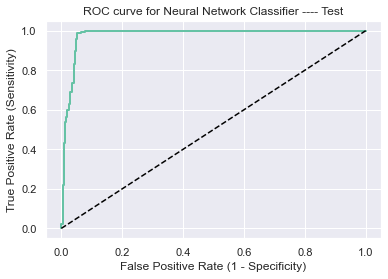

In [40]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Probs[:,1], pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Neural Network Classifier ---- Test')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### 3.3 Decision Tree<a class="anchor" id="step3.3"></a>

In [41]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier 

#### 3.3.1 Define variables<a class="anchor" id="step3.3.1"></a>

In [42]:
#split dataset in features and target variable
feature_cols = ['credit_class','sales_channel','region_US','state_US','handset']
X = df[feature_cols] # Features
y = df.upsell_xsell # Target variable

#### 3.3.2 Split Dataset for Training and Testing<a class="anchor" id="step3.3.2"></a>

+ 25% as test data set, 75% as training data set

In [43]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
# Since all features in feature_cols are categorical variables
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['credit_class','sales_channel','region_US','state_US','handset'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [45]:
# Undersample datasets
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
x_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 880), (1.0, 880)]


In [46]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 0)
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#### 3.3.3 Fit Decision Tree Classifier<a class="anchor" id="step3.3.3"></a>

In [47]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth =10, random_state = 42)
# fit the model with data
clf.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [48]:
y_pred_clf = clf.predict(X_Test)
Y_Probs = clf.predict_proba(X_Test)

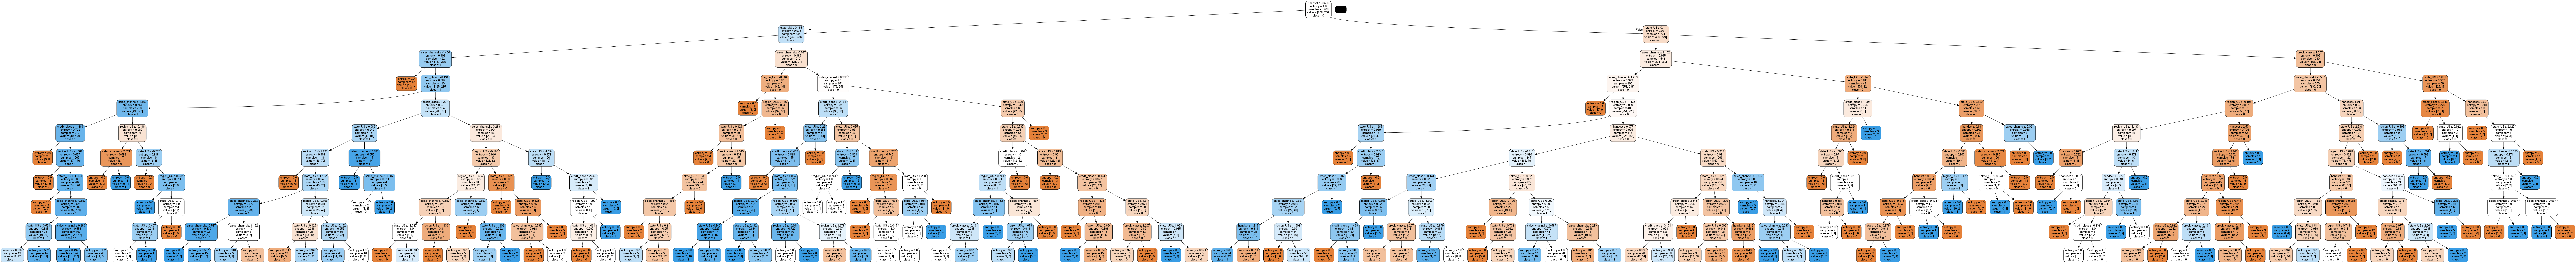

In [49]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#### 3.3.4 Evaluation of the Random Forest model performance<a class="anchor" id="step3.3.4"></a>

Confusion matrix

 [[ 96  76]
 [ 65 115]]

True Negatives(TN) =  96

True Positives(TP) =  115

False Positives(FP) =  76

False Negatives(FN) =  65


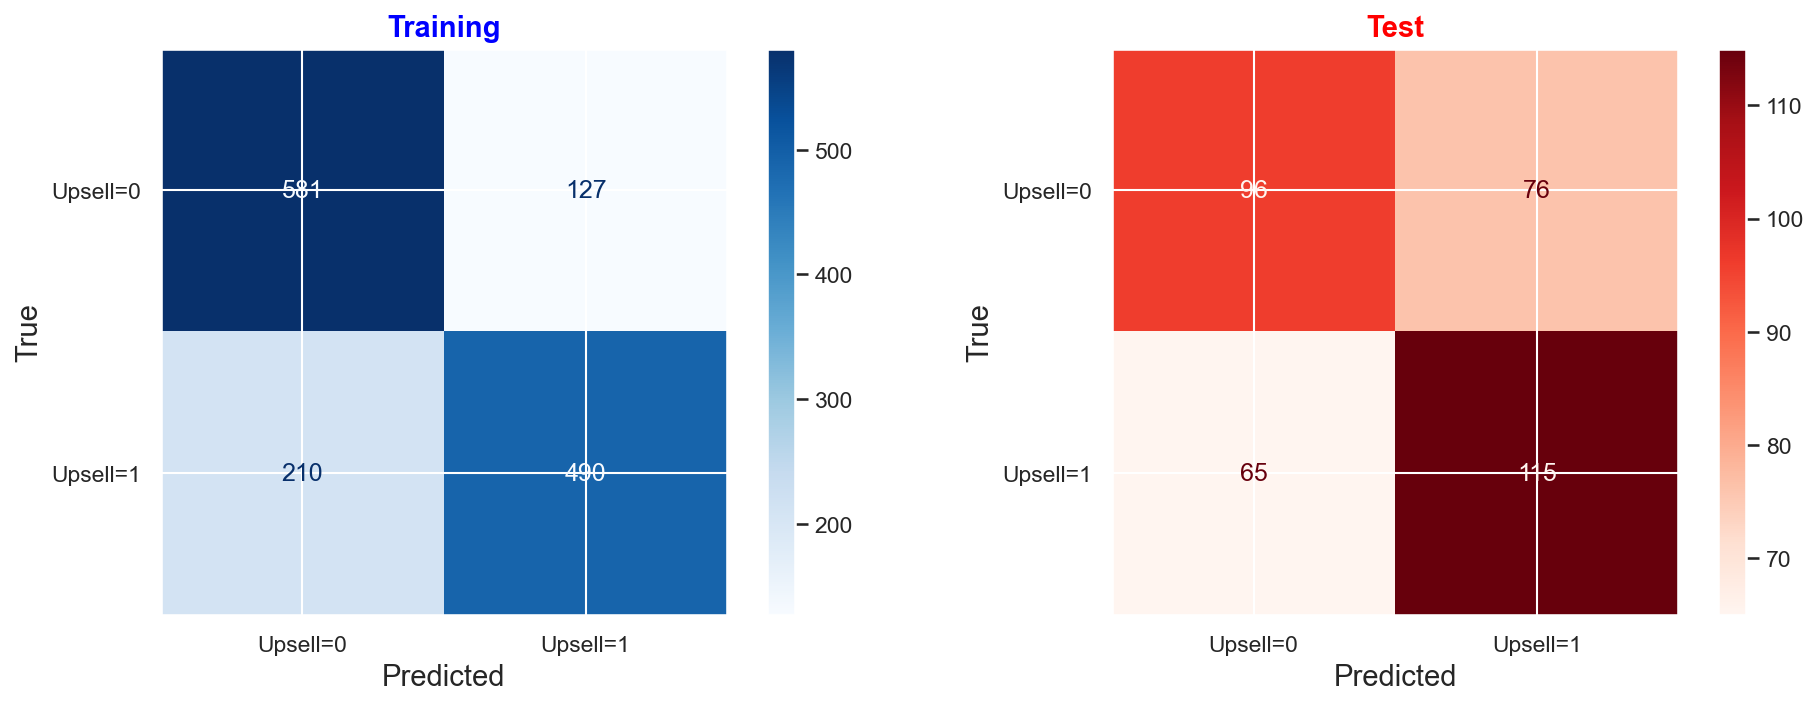

In [50]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, y_pred_clf)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TN) = ', cm[0,0])  #Actual Negative:0 and Predict Negative:0
print('\nTrue Positives(TP) = ', cm[1,1])  #Actual Positive:1 and Predict Positive:1
print('\nFalse Positives(FP) = ', cm[0,1])  #Actual Negative:0 but Predict Positive:1
print('\nFalse Negatives(FN) = ', cm[1,0])   #Actual Positive:1 but Predict Negative:0

from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(15,5),dpi=150)
disp = ConfusionMatrixDisplay.from_estimator( clf, X_Train, Y_Train, display_labels=["Upsell=0","Upsell=1"],ax=axs[0],cmap=plt.cm.Blues)
axs[0].set_title("Training",fontsize=14,color="blue",fontweight="bold")
axs[0].set_xlabel("Predicted",fontsize=14)
axs[0].set_ylabel("True",fontsize=14)

disp = ConfusionMatrixDisplay.from_estimator( clf, X_Test, Y_Test, display_labels=["Upsell=0","Upsell=1"],ax=axs[1],cmap=plt.cm.Reds)
axs[1].set_title("Test",fontsize=14,color="red",fontweight="bold")
axs[1].set_xlabel("Predicted",fontsize=14)
axs[1].set_ylabel("True",fontsize=14)


plt.show()  

In [51]:
accuracyscore[3]=accuracy_score(Y_Test, y_pred_clf)
precisionscore[3]=precision_score(Y_Test, y_pred_clf)
recallscore[3]=recall_score(Y_Test, y_pred_clf)
f1score[3]=f1_score(Y_Test, y_pred_clf)
rocaucscore[3]=roc_auc_score(Y_Test, y_pred_clf)

print('Model Accuracy score: {0:0.4f}'. format(accuracyscore[3]))
print('Model Precision score: {0:0.4f}'. format(precisionscore[3]))
print('Model Recall score: {0:0.4f}'. format(recallscore[3]))
print('Model F1 score: {0:0.4f}'. format(f1score[3]))
print('Model ROC AUC score: {0:0.4f}'. format(rocaucscore[3]))

print(classification_report(Y_Test, y_pred_clf))

Model Accuracy score: 0.5994
Model Precision score: 0.6021
Model Recall score: 0.6389
Model F1 score: 0.6199
Model ROC AUC score: 0.5985
              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58       172
         1.0       0.60      0.64      0.62       180

    accuracy                           0.60       352
   macro avg       0.60      0.60      0.60       352
weighted avg       0.60      0.60      0.60       352



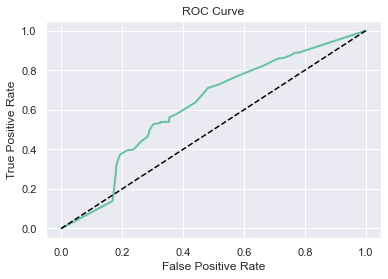

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Probs[:,1], pos_label=1) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='k', label='random chance')
plt.rcParams['font.size'] = 12
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 3.4 Random Forest<a class="anchor" id="step3.4"></a>

In [53]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### 3.4.1 Define variables<a class="anchor" id="step3.2.1"></a>

In [54]:
# Define the Predictor variables to be all variables other than the ID and response variable
x=df.drop(['upsell_xsell','Customer_ID'], axis = 1)
y=df["upsell_xsell"]

#### 3.4.2 Split Dataset for Training and Testing<a class="anchor" id="step3.4.2"></a>

+ 25% as test data set, 75% as training data set

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
# Showing array of the test and train sets
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape : ",y_test.shape)

X_train shape:  (7500, 17)
X_test shape :  (2500, 17)
Y_train shape:  (7500,)
Y_test shape :  (2500,)


#### 3.4.3 Fit Random Forest Classifier<a class="anchor" id="step3.4.3"></a>

+ Api document:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier

In [56]:
# Used for one-hot to encode category features
categorical_transformer = Pipeline([ ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Let's normalize
numerical_transformer = Pipeline( [  ('scaler', StandardScaler()) ])

# combine two methods
preprocessor = ColumnTransformer( [ 
                                                                ('onehot_pipe', categorical_transformer, category_cols),                                                                 
                                                                ('scaler_pipe', numerical_transformer, numerical_cols) 
                                                            ], remainder = 'passthrough')

# data cleaning and modeling
model = Pipeline(
    [
        ('preprocessing', preprocessor),
        # Since the sample size of y=0 is much larger than that of =1, 
        # we draw as many samples from y=0 as from =1 to train the model
        ('sampling', RandomUnderSampler(random_state=0)),
        ('classifier', RandomForestClassifier(random_state=0))   
    ])

# Using the GridSearchCV to do hyperparameter optimization
# Random forest focuses on the depth of the tree as a hyperparameter
parameters={'classifier__max_depth': range(2,21)}

# 5-fold cross validation was used to find the best hyperparameter values
grid_model = GridSearchCV(model, parameters,cv=5, scoring='recall', n_jobs=-1)

# model training
grid_model.fit(X_train, y_train)

# Best parameters
print("best_params_:  ",grid_model.best_params_)

best_params_:   {'classifier__max_depth': 14}


__Interpretation of the GridSearchCV:__ \
The result of hyperparameter optimization shows that the maximum depth of the random forest model is set to 8

In [57]:
y_train_pred,y_test_pred=grid_model.best_estimator_.predict(X_train), grid_model.best_estimator_.predict(X_test)

__Feature Importance:__\
let's take a look at which features are important for identifying upsell

In [58]:
# Feature importance of random forests
feature_importance=grid_model.best_estimator_[2].feature_importances_

# Get the names of the features used to train the model
model_feature_names=[x.split("__")[1] for x in grid_model.best_estimator_.steps[0][1].get_feature_names_out()]
df_feature_importance=pd.DataFrame(zip(model_feature_names, feature_importance), columns=["feature","importance"])

df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)

# Shows the top 20 important feature names
df_feature_importance.head(20)

,feature,importance
86,bill_data_usg_m03,0.078935
78,Est_HH_Income,0.072621
79,cs_ttl_pop,0.064973
84,data_device_age,0.063515
81,cs_ttl_female,0.061788
77,rfm_score,0.061525
82,cs_ttl_hhlds,0.061517
85,equip_age,0.059580
80,cs_ttl_male,0.059295
76,acct_age,0.058281


Text(0.5, 1.0, 'Top 20 Important Features by Random Forest Model')

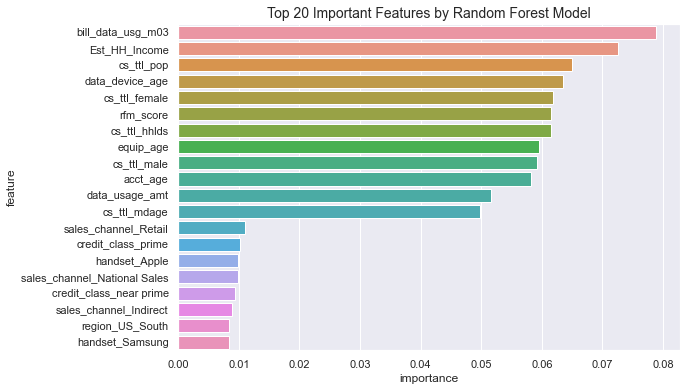

In [59]:
plt.figure(figsize=(9,6))

sns.barplot(y="feature",x="importance", data=df_feature_importance.head(20))
plt.title("Top 20 Important Features by Random Forest Model", fontsize=14)

#### 3.4.4 Evaluation of the Random Forest model performance<a class="anchor" id="step3.4.4"></a>

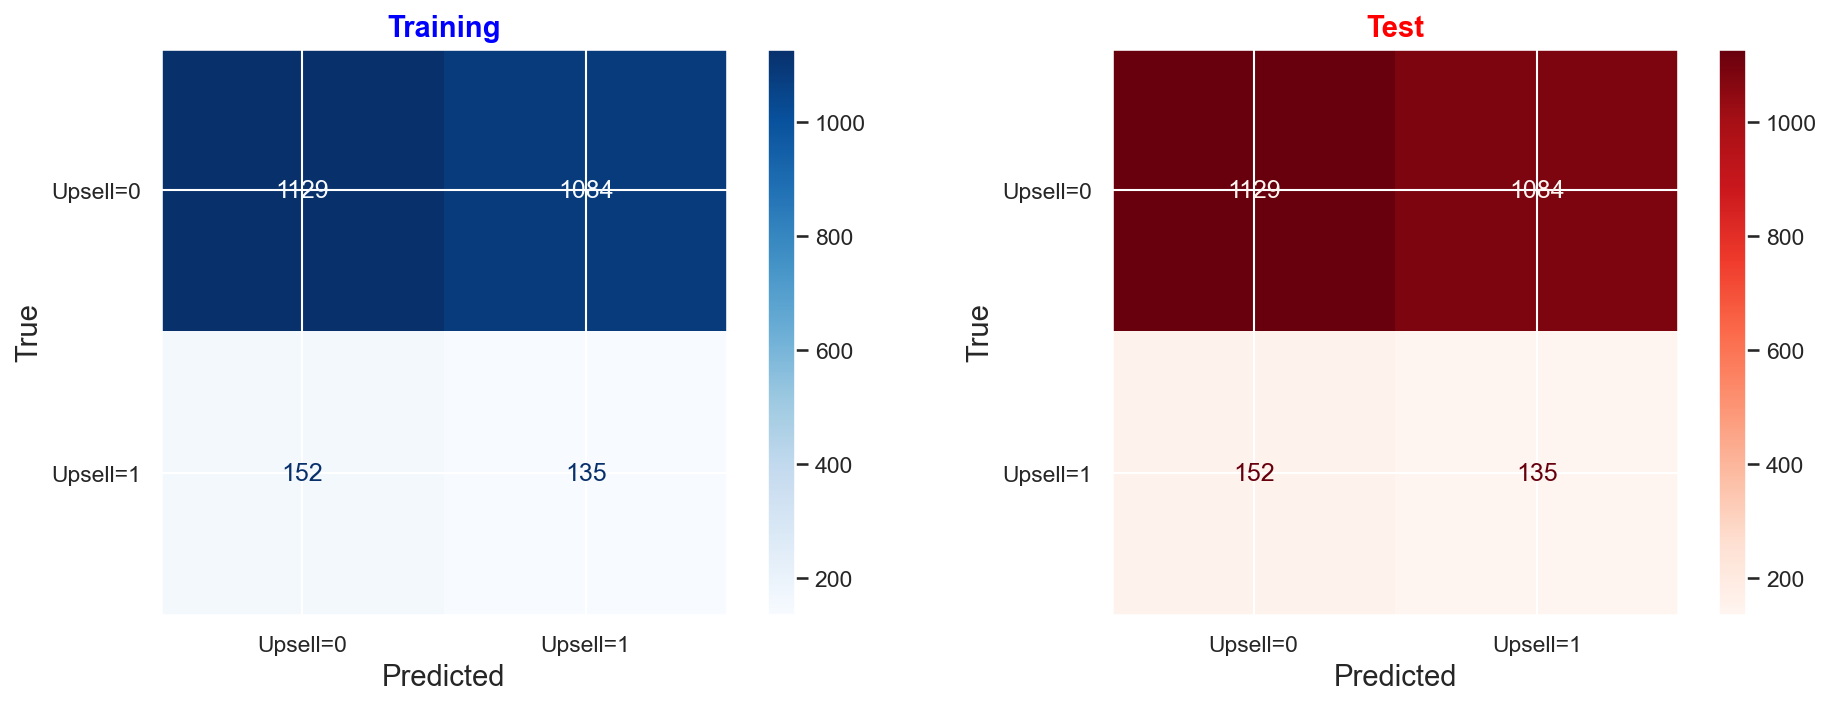

In [60]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(15,5),dpi=150)

cm_train = confusion_matrix(y_train,y_train_pred)
disp = ConfusionMatrixDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test, 
                                             display_labels=["Upsell=0","Upsell=1"],ax=axs[0],cmap=plt.cm.Blues)
axs[0].set_title("Training",fontsize=14,color="blue",fontweight="bold")
axs[0].set_xlabel("Predicted",fontsize=14)
axs[0].set_ylabel("True",fontsize=14)


cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test, 
                                             display_labels=["Upsell=0","Upsell=1"],ax=axs[1],cmap=plt.cm.Reds)
axs[1].set_title("Test",fontsize=14,color="red",fontweight="bold")
axs[1].set_xlabel("Predicted",fontsize=14)
axs[1].set_ylabel("True",fontsize=14)

plt.show()  

In [61]:
accuracyscore[4]=accuracy_score(y_test, y_test_pred)
precisionscore[4]=precision_score(y_test, y_test_pred)
recallscore[4]=recall_score(y_test, y_test_pred)
f1score[4]=f1_score(y_test, y_test_pred)
rocaucscore[4]=roc_auc_score(y_test, y_test_pred)

print('Model Recall score: {0:0.4f}'. format(recallscore[4]))

y_train_pred,y_test_pred=grid_model.best_estimator_.predict(X_train), grid_model.best_estimator_.predict(X_test)
print()
print("Train Classification Report：")
print(classification_report(y_train,y_train_pred))
print()

print("Test Classification Report：")
print(classification_report(y_test,y_test_pred))
print()

Model Recall score: 0.4704

Train Classification Report：
              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74      6613
         1.0       0.24      1.00      0.39       887

    accuracy                           0.64      7500
   macro avg       0.62      0.79      0.57      7500
weighted avg       0.91      0.64      0.70      7500


Test Classification Report：
              precision    recall  f1-score   support

         0.0       0.88      0.51      0.65      2213
         1.0       0.11      0.47      0.18       287

    accuracy                           0.51      2500
   macro avg       0.50      0.49      0.41      2500
weighted avg       0.79      0.51      0.59      2500




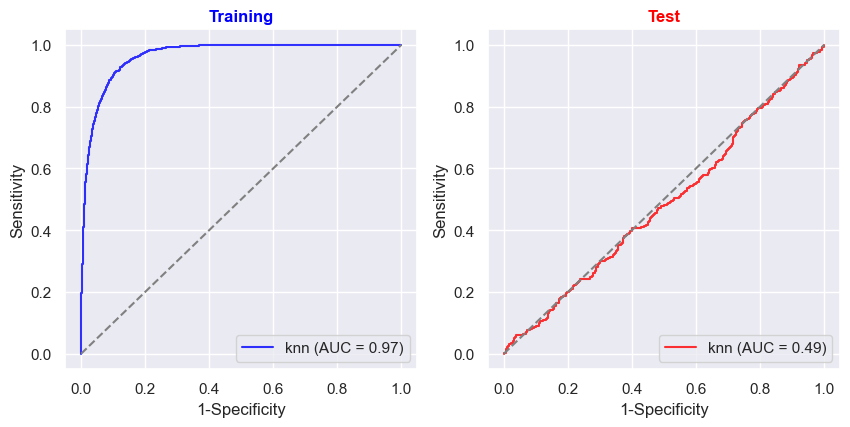

In [62]:
#ROC Curve
from sklearn.metrics import RocCurveDisplay
fig,axs=plt.subplots(1,2,figsize=(10,4.5),dpi=100)

disp = RocCurveDisplay.from_estimator(grid_model.best_estimator_, X_train, y_train, ax=axs[0], alpha=0.8,c="blue",name="knn")
axs[0].plot([0,1],[0,1],linestyle="--",c="gray")
axs[0].set_title("Training",fontsize=12,color="blue",fontweight="bold")
axs[0].set_xlabel("1-Specificity",fontsize=12)
axs[0].set_ylabel("Sensitivity",fontsize=12)

disp =RocCurveDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test, ax=axs[1], alpha=0.8,c="red",name="knn")
axs[1].plot([0,1],[0,1],linestyle="--",c="gray")
axs[1].set_title("Test",fontsize=12,color="red",fontweight="bold")
axs[1].set_xlabel("1-Specificity",fontsize=12)
axs[1].set_ylabel("Sensitivity",fontsize=12)
plt.show()

__Interpretation of the performance:__\
The roc of the test is also not very good, indicating that this upsell is not very predictable 
But the model is still a little bit better than random guess. Random guess is about 11.7%, 
but now the model can actually find 52% (see test recall).

## 4. Comparison of the performance of different ML Techniques<a class="anchor" id="step4"></a>

Since some models used undersampling techniques while some didn't, the Performance of different ML Techniques are mainly compared by different types of scores

Types of Scores:
1. Accuracy Score: The number of correct predictions over total number of predictions made
2. Precision Score: The number of positive class predictions that actually belong to the positive class.
3. Recall Score: The number of positive class predictions made out of all positive examples in the dataset.
4. F1 Score: A single score that balances both the concerns of precision and recall in one number.
5. ROC AUC Score: The area under the receiver operating characteristic (ROC) curve

In [63]:
scores = [accuracyscore,
precisionscore,
recallscore,
f1score,
rocaucscore]

ScoreNames = ['Accuracy Score',
'Precision Score',
'Recall Score',
'F1 Score',
'ROC AUC Score']

ML_Name = ['Logistic Regression', 
           'Neural Network (data unprocessed)', 
           'Neural Network (data processed)',
          'Decision Tree',
          'Random Forest (data processed)']

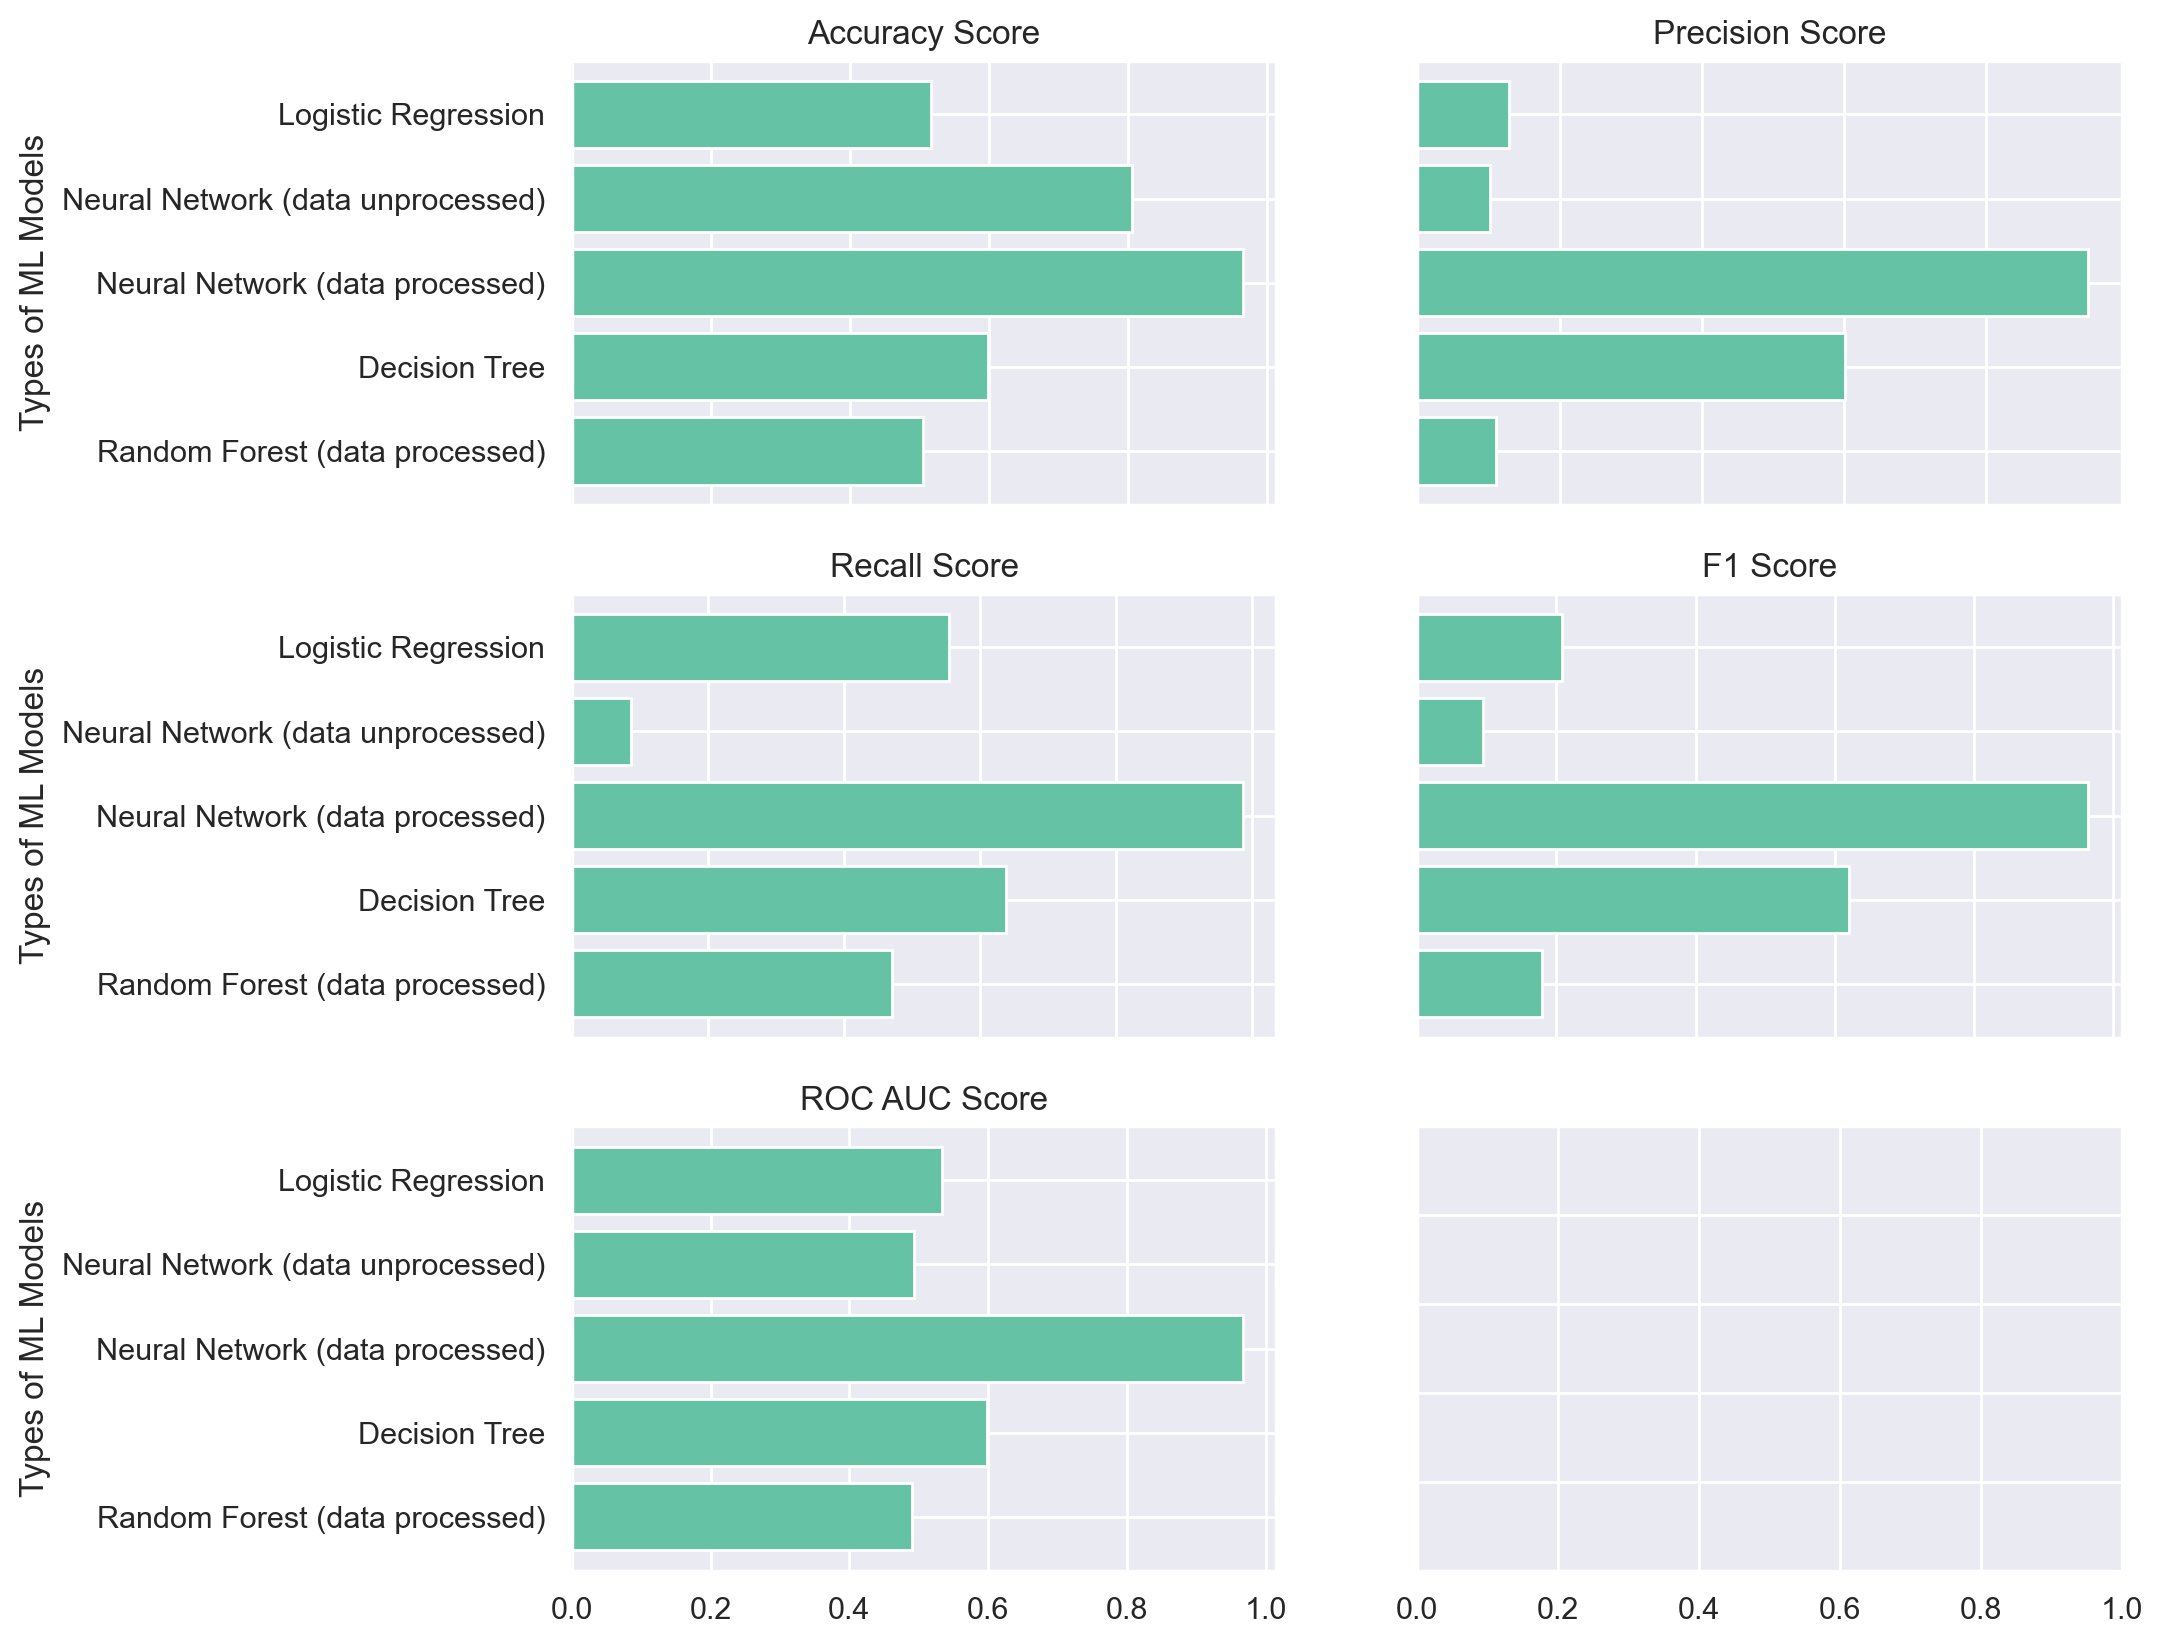

In [64]:
fig,axs=plt.subplots(3, 2,figsize=(10,10),dpi=200)
for i in range(3):
    for j in range(2):
        if i+j==3:
            break
        axs[i,j].barh(ML_Name,scores[2*i+j])
        axs[i,j].set_title(ScoreNames[2*i+j])
        axs[i,j].invert_yaxis()
for ax in axs.flat:
    ax.set(ylabel='Types of ML Models')
for ax in axs.flat:
    ax.label_outer()